In [16]:
print("""PLOTTING COMPARISIONS for ZE 2303 GPZ""")
# ~ 3 day increments at one station --> compare
# next, compare to other stations

PLOTTING COMPARISIONS for ZE 2303 GPZ


In [17]:
import obspy
from obspy import read, UTCDateTime
from obspy.io.xseed import Parser
from obspy.signal import PPSD
import numpy as np
import matplotlib.pyplot as plt
from obspy.imaging.cm import pqlx
import os
from obspy.clients.fdsn import Client

In [ ]:
### Getting the data from IRIS
# using ZE 2303 GPZ, July 12 through July 31ish, in 3 day windows

import obspy
from obspy import UTCDateTime
from obspy.clients import fdsn
import os

t1 = UTCDateTime(2023, 7, 12) # Start time
t2 = UTCDateTime(2023, 7, 14) # End time
delta = 1800 # time in seconds, reduce to reduce file size
stas = [2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 
        'G2301', 'G2302', 'G2303', 'G2304', 'G2305', 'G2306', 'G2307', 'G2308', 'G2309', 'G2310', 'G2311',
        'G2312', 'G2313', 'G2314', 'G2315', 'G2316'] 
#station identifier set for both ZE(3C Nodes)[PH5] and ZD(GEM loggers & in-ground sesimic data)[MiniSEED]. 
#Convention is year/site (YR/XX), G(YR/XX) for GEM loggers
##NOTE: ZD is missing G2308 & G2316 entirely, gaps in others
stas = [2303] # station id's actually used for resampling

#Be sure to use the appropriate channel for the data type 
#'fdsnws/dataselect' for MINIseed (GEM and RT130)
#'ph5ws/dataselect' for PH5 (3C node)
DATASELECT = 'http://service.iris.edu/ph5ws/dataselect/1'
c = fdsn.client.Client(
    service_mappings={
        'dataselect': DATASELECT,
    },
)

username = 'username' ### add your IRIS credentials
password = 'password'
c.set_credentials(username, password)

path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'  ### change path to where you'd want to store .mseeds
if not os.path.exists(path):
    # making new path/directory in computer
    os.makedirs(path, exist_ok=True)

tNow = t1 #start time
req = [] #UNSURE????
while tNow < t2:
    print(tNow)
    for nowsta in stas:
        # req.append(('ZD', nowsta, '01', 'HDF', tNow, tNow+delta)) for GEM infrasound data in MINIseed
        # req.append(('ZE', nowsta, '', 'GPZ', tNow, tNow+delta)) for SmartSolo 3C node data
        print(nowsta)
        print('Getting data')
        S = c.get_waveforms('ZE', nowsta, '', 'GPZ', tNow, tNow+delta)
        print('Resampling')
        S.resample(350) # resampled rate for final analysis. note: remeber what Nyquist f you would like to work with, multiply by (1.1<f<1.5) for this value
        # Recently using 350Hz for 3C data and 120Hz for GEM data
        print('Saving')
        for tr in S:
            filename = '{}/{}_{}.mseed'.format(path, tr.id, tr.stats.starttime.strftime('%Y%m%d%H%M%S')) # data format, tr.id==data directory, time format
            #filename = 'E:/ActiveResearch/NisquallyRiver_SeismicInfrasound/NodeData/3C/2023/20240720_20240722/{}_{}.mseed'.format(tr.id, tr.stats.starttime.strftime('%Y%m%d%H%M%S')) # data format, tr.id==data directory, time format
            
            tr.write(filename)
    tNow = tNow + delta
print('done')

In [10]:
### getting the metadata

from obspy.clients.fdsn import Client
from obspy import read

# initialize the ObsPy Client for IRIS using the FDSN web service
client = Client("IRISPH5") # just "IRIS" doesn't work

# define parameters
network = "ZE"  # Network code
station = "2303"  # Station code
location = "*"  # * Any location
channel = "GPZ"  # Channel code
start_time = "2023-07-12T19:35:57"  # Start date
end_time = "2023-09-08T07:00:00"  # End date

# query metadata from IRIS
metadata = client.get_stations(network=network, station=station, location=location, channel=channel, starttime=start_time, endtime=end_time)

# print the metadata returned
print(metadata)

##There will be a warning that pops up about the ph5 event service not being usable,
##but EarthScope people said that should be ok for our purposes, so can ignore the warning

Inventory created at 2025-02-19T20:59:07.674100Z
	Created by: IRIS WEB SERVICE: ph5ws-station | version: 1.1.8
		    http://service.iris.edu/ph5ws/station/1/query?starttime=2023-07-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			ZE
		Stations (1):
			ZE.2303 (N03)
		Channels (0):



C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\clients\fdsn\wadl_parser.py:107: UserWarning: The 'event' service at 'http://service.iris.edu/ph5/event/1/' cannot deal with the following required parameters: mindepth, maxdepth, orderby
They will not be available for any requests. Any attempt to use them will result in an error.
  warnings.warn(msg)


Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-12T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 12, 19, 35, 57), UTCDateTime(2023, 7, 12, 20, 5, 57), UTCDateTime(2023, 7, 12, 20, 35, 57), UTCDateTime(2023, 7, 12, 21, 5, 57), UTCDateTime(2023, 7, 12, 21, 35, 57), UTCDateTime(2023, 7, 12, 22, 5, 57), UTCDateTime(2023, 7, 12, 22, 35, 57), UTCDateTime(2023, 7, 12, 23, 5, 57), UTCDateTime(2023, 7, 12, 23, 35, 57), UTCDateTime(2023, 7, 13, 0, 5, 57)]




<Figure size 1000x600 with 0 Axes>

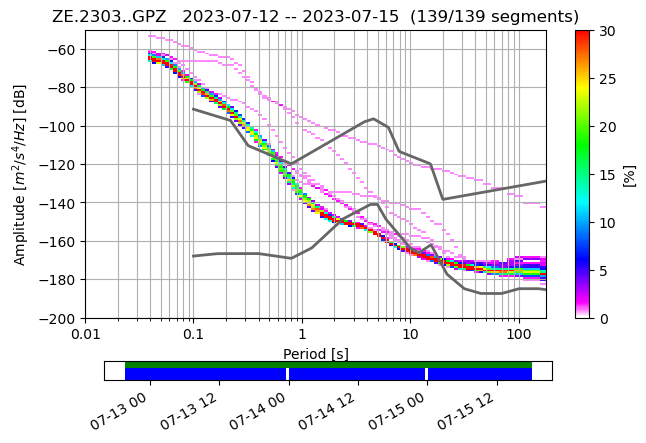

In [5]:
### PPSD for July 12-15, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 12, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

# number of files to process for 3 days
# will find a better way so it's solely based on dates
files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)

# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
for i, filename in enumerate(files[:files_to_process]):
    try:
        # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate

            # loop through traces in first file to set up the PPSD
            metadata =  {'network': S[0].stats.network,
                        'station': S[0].stats.station,
                        'location': S[0].stats.location,
                        'channel': S[0].stats.channel,
                        'sampling_rate': S[0].stats.sampling_rate,
                        'starttime': S[0].stats.starttime,
                        'poles': [],
                        'zeros': [],
                        'gain': 1.0, # gain = 1.0 is a placeholder
                        'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                      }
            if ppsd is None:
                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)

            #ppsd = PPSD(tr.stats, metadata=metadata, ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")
    

Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\signal\spectral_estimation.py:888: UserWarning: Trace is shorter than this PPSD's 'ppsd_length' (1800.0 seconds). Skipping trace: ZE.2303..GPZ | 2023-07-15T23:35:57.000000Z - 2023-07-16T00:00:00.020000Z | 50.0 Hz, 72152 samples
  warnings.warn(msg)


Data accumulated for 3-day period starting from 2023-07-15T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 15, 19, 35, 57), UTCDateTime(2023, 7, 15, 20, 5, 57), UTCDateTime(2023, 7, 15, 20, 35, 57), UTCDateTime(2023, 7, 15, 21, 5, 57), UTCDateTime(2023, 7, 15, 21, 35, 57), UTCDateTime(2023, 7, 15, 22, 5, 57), UTCDateTime(2023, 7, 15, 22, 35, 57), UTCDateTime(2023, 7, 15, 23, 5, 57), UTCDateTime(2023, 7, 16, 0, 0), UTCDateTime(2023, 7, 16, 0, 30)]




<Figure size 1000x600 with 0 Axes>

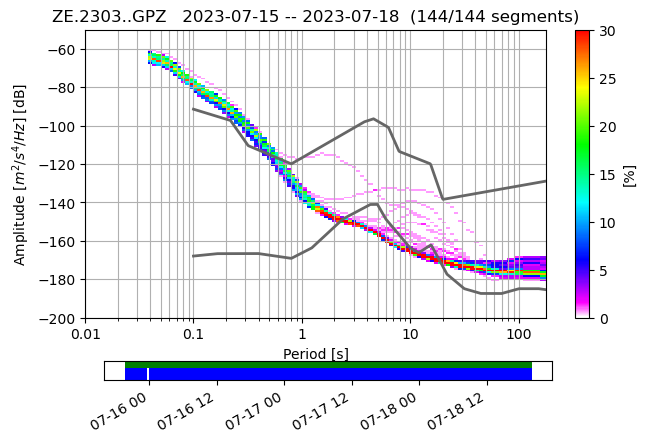

In [6]:
### PPSD for July 15-18, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 15, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []

# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)

for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    
# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate
            
            # loop through traces in first file to set up the PPSD
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
                #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")


Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-18T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 18, 20, 0), UTCDateTime(2023, 7, 18, 20, 30), UTCDateTime(2023, 7, 18, 21, 0), UTCDateTime(2023, 7, 18, 21, 30), UTCDateTime(2023, 7, 18, 22, 0), UTCDateTime(2023, 7, 18, 22, 30), UTCDateTime(2023, 7, 18, 23, 0), UTCDateTime(2023, 7, 18, 23, 30), UTCDateTime(2023, 7, 19, 0, 0), UTCDateTime(2023, 7, 19, 0, 30)]




<Figure size 1000x600 with 0 Axes>

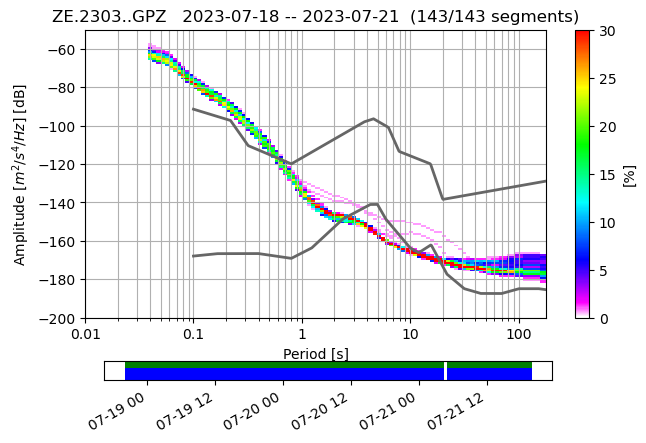

In [11]:
### PPSD for July 18-21, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 18, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []
# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    
# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate
            
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)

                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
                #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")


Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-21T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 21, 20, 0), UTCDateTime(2023, 7, 21, 20, 30), UTCDateTime(2023, 7, 21, 21, 0), UTCDateTime(2023, 7, 21, 21, 30), UTCDateTime(2023, 7, 21, 22, 0), UTCDateTime(2023, 7, 21, 22, 30), UTCDateTime(2023, 7, 21, 23, 0), UTCDateTime(2023, 7, 21, 23, 30), UTCDateTime(2023, 7, 22, 0, 0), UTCDateTime(2023, 7, 22, 0, 30)]




<Figure size 1000x600 with 0 Axes>

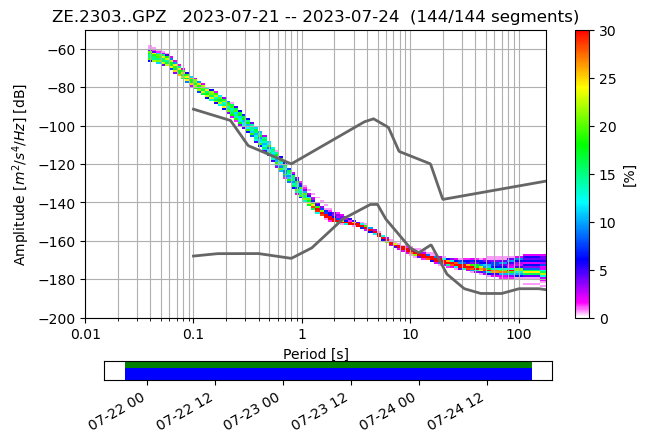

In [12]:
### PPSD for July 21-24, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 21, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []

# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    
# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate
            #print(len(tr))
            
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")


Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-24T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 24, 20, 0), UTCDateTime(2023, 7, 24, 20, 30), UTCDateTime(2023, 7, 24, 21, 0), UTCDateTime(2023, 7, 24, 21, 30), UTCDateTime(2023, 7, 24, 22, 0), UTCDateTime(2023, 7, 24, 22, 30), UTCDateTime(2023, 7, 24, 23, 0), UTCDateTime(2023, 7, 24, 23, 30), UTCDateTime(2023, 7, 25, 0, 0), UTCDateTime(2023, 7, 25, 0, 30)]




<Figure size 1000x600 with 0 Axes>

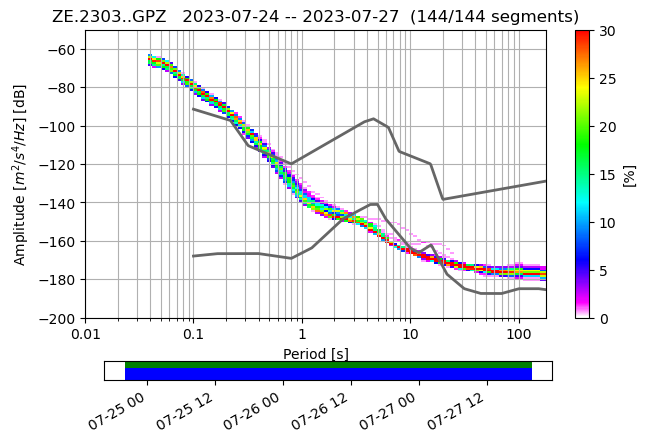

In [13]:
### PPSD for July 24-27, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 24, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []

# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    
# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate
            #print(len(tr))
            
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

Initialized PPSD with ppsd_length = 1800.0 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-27T19:35:57.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 27, 20, 0), UTCDateTime(2023, 7, 27, 20, 30), UTCDateTime(2023, 7, 27, 21, 0), UTCDateTime(2023, 7, 27, 21, 30), UTCDateTime(2023, 7, 27, 22, 0), UTCDateTime(2023, 7, 27, 22, 30), UTCDateTime(2023, 7, 27, 23, 0), UTCDateTime(2023, 7, 27, 23, 30), UTCDateTime(2023, 7, 28, 0, 0), UTCDateTime(2023, 7, 28, 0, 30)]




<Figure size 1000x600 with 0 Axes>

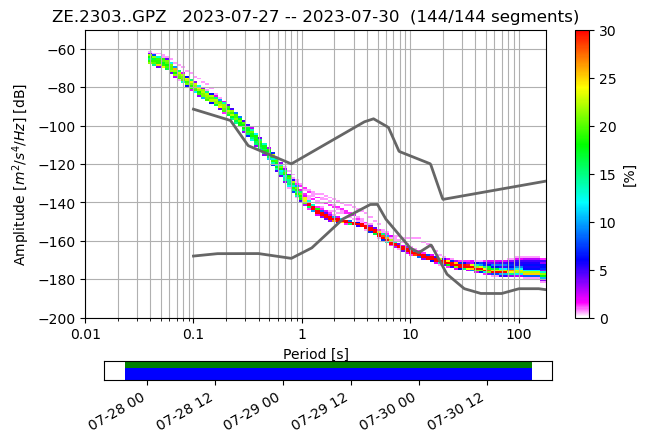

In [18]:
### PPSD for July 24-27, 2023

# define the time window to process
tNow = UTCDateTime(2023, 7, 27, 19, 35, 57)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])


files_to_process = []
# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    

# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = len(tr) / tr.stats.sampling_rate
            #print(len(tr))
            

        # loop through traces in first file to set up the PPSD
        # for i, tr in enumerate(S):
        #     # if ppsd is None, initialize with first trace's length
        #     if ppsd is None:
                #ppsd_length = len(tr)/tr.stats.sampling_rate # sec
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)

            #ppsd = PPSD(tr.stats, metadata=metadata, ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")


Initialized PPSD with ppsd_length = 60 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-07-13T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 13, 0, 0), UTCDateTime(2023, 7, 13, 0, 0, 30), UTCDateTime(2023, 7, 13, 0, 1), UTCDateTime(2023, 7, 13, 0, 1, 30), UTCDateTime(2023, 7, 13, 0, 2), UTCDateTime(2023, 7, 13, 0, 2, 30), UTCDateTime(2023, 7, 13, 0, 3), UTCDateTime(2023, 7, 13, 0, 3, 30), UTCDateTime(2023, 7, 13, 0, 4), UTCDateTime(2023, 7, 13, 0, 4, 30)]




<Figure size 1000x600 with 0 Axes>

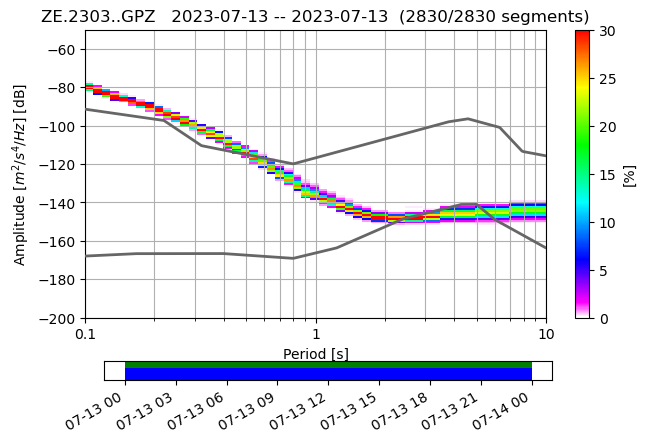

In [29]:
### Zooming in on July 13 only

# define the time window to process
tNow = UTCDateTime(2023, 7, 13)#, 19, 35, 57)  # Start time
tEnd = tNow + 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []
# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)
    
# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = 60#len(tr) / tr.stats.sampling_rate
            #print(len(tr))

            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length)

            #ppsd = PPSD(tr.stats, metadata=metadata, ppsd_length=ppsd_length)
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(period_lim=(0.1,10),cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for specified time window.")

Initialized PPSD with ppsd_length = 60 seconds based on first trace.
Data accumulated for 3-day period starting from 2023-08-10T20:57:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 10, 20, 57), UTCDateTime(2023, 8, 10, 20, 57, 30), UTCDateTime(2023, 8, 10, 20, 58), UTCDateTime(2023, 8, 10, 20, 58, 30), UTCDateTime(2023, 8, 10, 20, 59), UTCDateTime(2023, 8, 10, 20, 59, 30), UTCDateTime(2023, 8, 10, 21, 0), UTCDateTime(2023, 8, 10, 21, 0, 30), UTCDateTime(2023, 8, 10, 21, 1), UTCDateTime(2023, 8, 10, 21, 1, 30)]




<Figure size 1000x600 with 0 Axes>

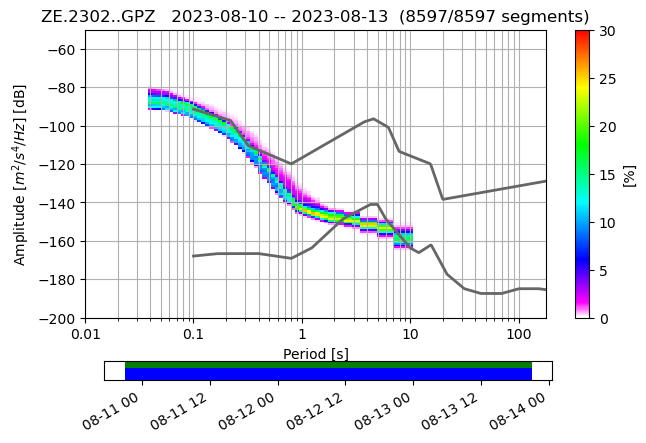

In [21]:
### this is ZE 2302 GPZ at August 8, 2023
# shows some gaps/skipping traces

# define the time window to process
tNow = UTCDateTime(2023, 8, 10, 20, 57, 00)  # Start time
tEnd = tNow + 3 * 24 * 3600  # End time (3 days later)

# path to .mseed folder
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'

# initialize PPSD object
ppsd = None  # initialize it to None so we can create it once we have a trace

# list to store all files
files = sorted([f for f in os.listdir(path) if f.endswith('.mseed')])

files_to_process = []

# number of files to process for 3 days
# will find a better way so it's solely based on dates
#files_to_process = 3 * 24 * 2  # 144 files (48 files per day * 3 days)
for filename in files:
     # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        #print(f"Converted UTCDateTime: {file_timestamp}")
    
        # only select files within the desired time range
        if tNow <= file_timestamp < tEnd:
            files_to_process.append(filename)  

# create a set to track processed times and avoid duplicates
#processed_times = set()

# loop through the first ~144 files
#for i, filename in enumerate(files[:files_to_process]):
for i, filename in enumerate(files_to_process):
    try:
        # # extract timestamp from the filename (filename format ZE.2303..GPZ_YYYYMMDDHHMMSS.mseed)
        # #print(f"Filename: {filename}")
        timestamp_str = filename.split('_')[-1].replace('.mseed', '')
        # #print(f"Extracted timestamp: {timestamp_str}")
        file_timestamp = UTCDateTime(timestamp_str)
        # #print(f"Converted UTCDateTime: {file_timestamp}")

        # read .mseed file
        S = obspy.read(os.path.join(path, filename))

        # resample (350 Hz for PPSD)
        S.resample(50)

        for tr in S:
            # set ppsd length to current trace's length
            ppsd_length = 60 #len(tr) / tr.stats.sampling_rate
            
            if ppsd is None:
                metadata =  {'network': S[0].stats.network,
                            'station': S[0].stats.station,
                            'location': S[0].stats.location,
                            'channel': S[0].stats.channel,
                            'sampling_rate': S[0].stats.sampling_rate,
                            'starttime': S[0].stats.starttime,
                            'poles': [],
                            'zeros': [],
                            'gain': 1.0, # gain = 1.0 is a placeholder
                            'sensitivity': 12731.783046 # @ 50.0 Hz (SEED Stage 0)
                          }

                ppsd = PPSD(S[0].stats, metadata=metadata,ppsd_length=ppsd_length) #60,120
                print(f"Initialized PPSD with ppsd_length = {ppsd_length} seconds based on first trace.")
            #break  # Exit the loop after initializing ppsd with the first trace
            ppsd.add(tr)
            
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {tNow}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # see first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")